**Importing the Necessary Libraries**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

**Data Set**

In [9]:
# Reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()
# Time stamps
from datetime import datetime


# Tech stocks used for the analysis
tech_lst = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_lst = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech_lst:
    globals()[stock] = yf.download(stock, start, end)


cmpy_lst = [AAPL, GOOG, MSFT, AMZN]
cmpy_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(cmpy_lst, cmpy_name):
    company["cmpy_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700,AMAZON
2023-07-28,129.690002,133.009995,129.330002,132.210007,132.210007,46317400,AMAZON
2023-07-31,133.199997,133.869995,132.380005,133.679993,133.679993,41901500,AMAZON
2023-08-01,133.550003,133.690002,131.619995,131.690002,131.690002,42098500,AMAZON
2023-08-02,130.149994,130.229996,126.820000,128.210007,128.210007,51027600,AMAZON
2023-08-03,127.480003,129.839996,126.410004,128.910004,128.910004,88585200,AMAZON
2023-08-04,141.059998,143.630005,139.320007,139.570007,139.570007,152938700,AMAZON
2023-08-07,140.990005,142.539993,138.949997,142.220001,142.220001,71213100,AMAZON
2023-08-08,140.619995,140.839996,138.419998,139.940002,139.940002,51710500,AMAZON


**APPLE Stats Description**

In [5]:
# Statistics summary
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,159.249244,161.012271,157.642470,159.379801,159.046671,7.057884e+07
std,18.175730,17.930481,18.451923,18.168835,18.321348,2.353363e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.470390,5.277610e+07
50%,154.789993,157.089996,153.369995,155.000000,154.602570,6.643510e+07
75%,172.775002,173.725006,171.535004,172.840004,172.485565,8.135480e+07
max,196.240005,198.229996,195.279999,196.449997,196.449997,1.647624e+08


We have only 255 records in one year because weekends are not included in the data.

**APPLE Stock Information**

In [6]:
# Information of AAPL
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-10 to 2023-08-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


**Historical View of the closing price of Tech Stocks**

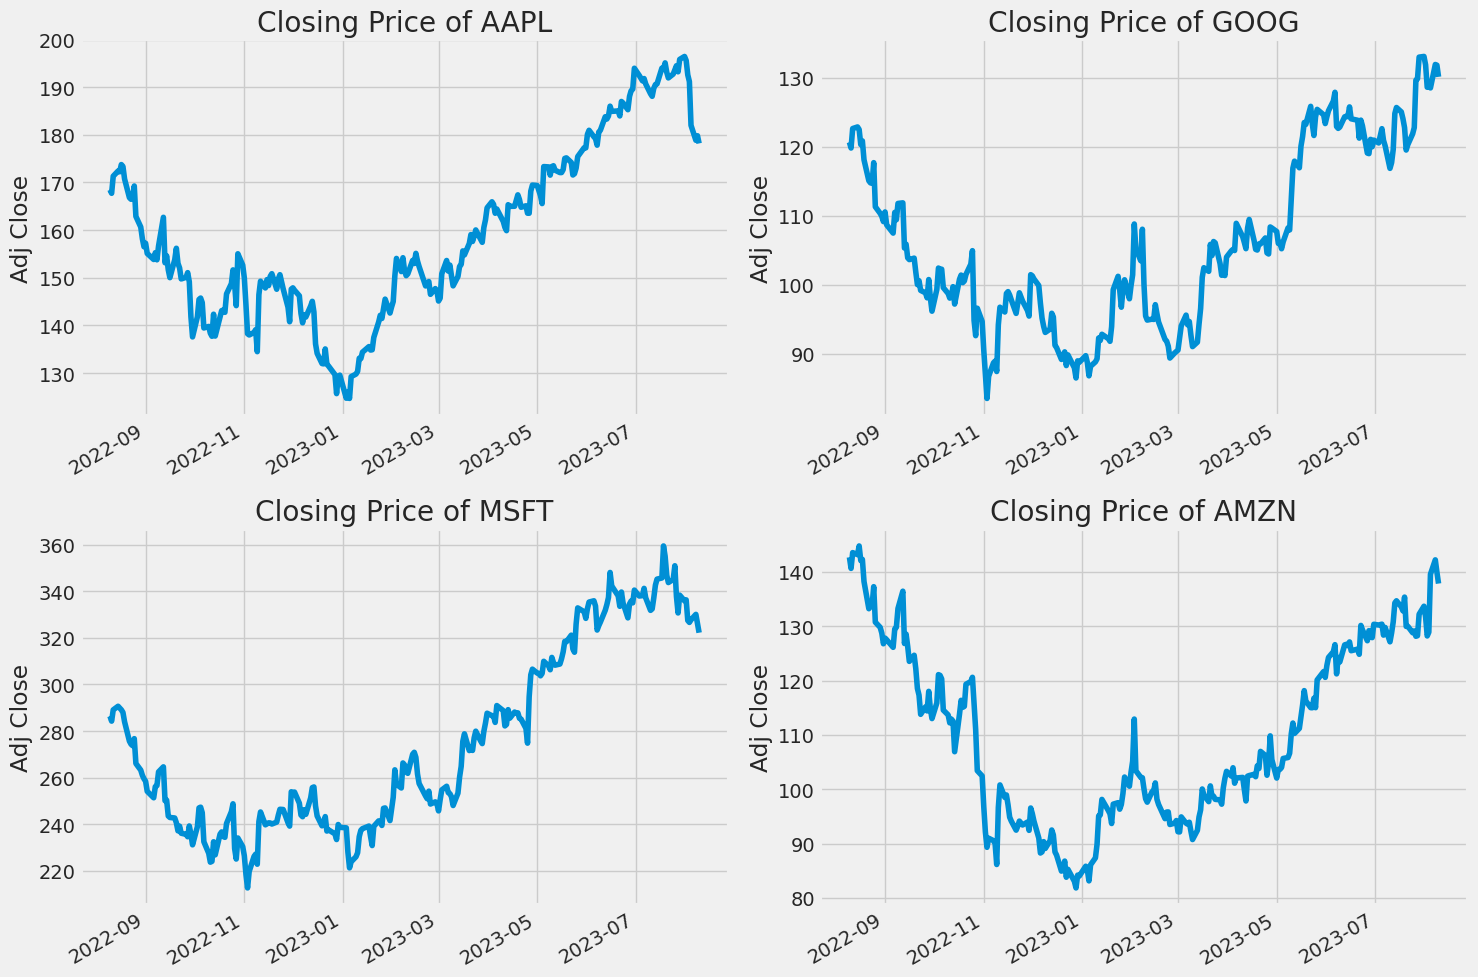

In [11]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(cmpy_lst, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_lst[i - 1]}")

plt.tight_layout()

**Sales Volume of Tech Stocks**

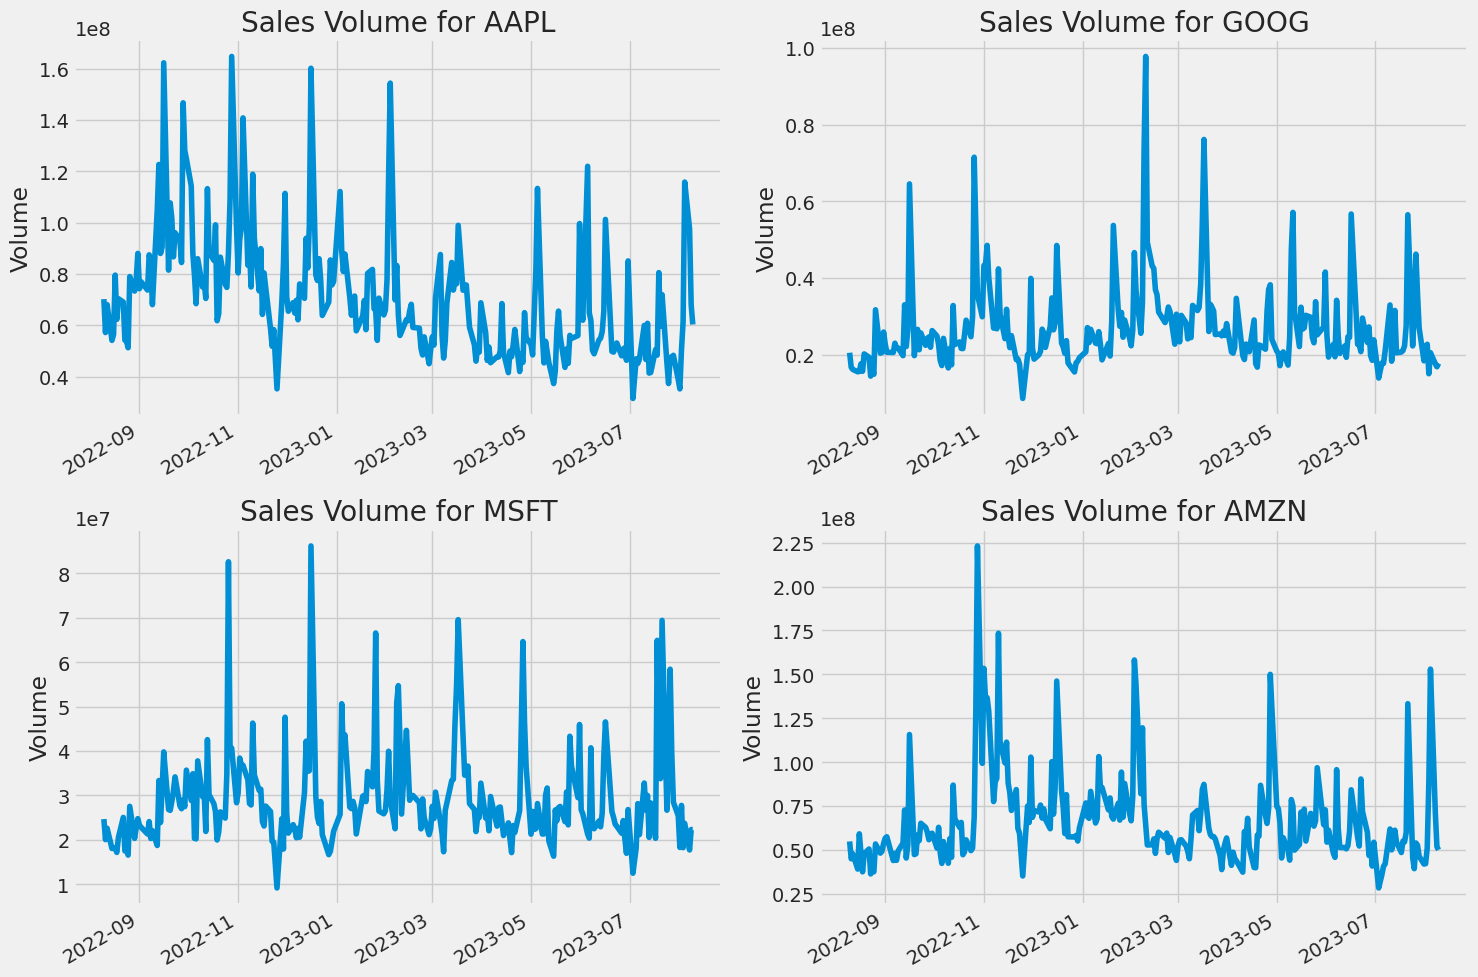

In [12]:
# plotting the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(cmpy_lst, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_lst[i - 1]}")

plt.tight_layout()

**Moving Average of Tech stocks**

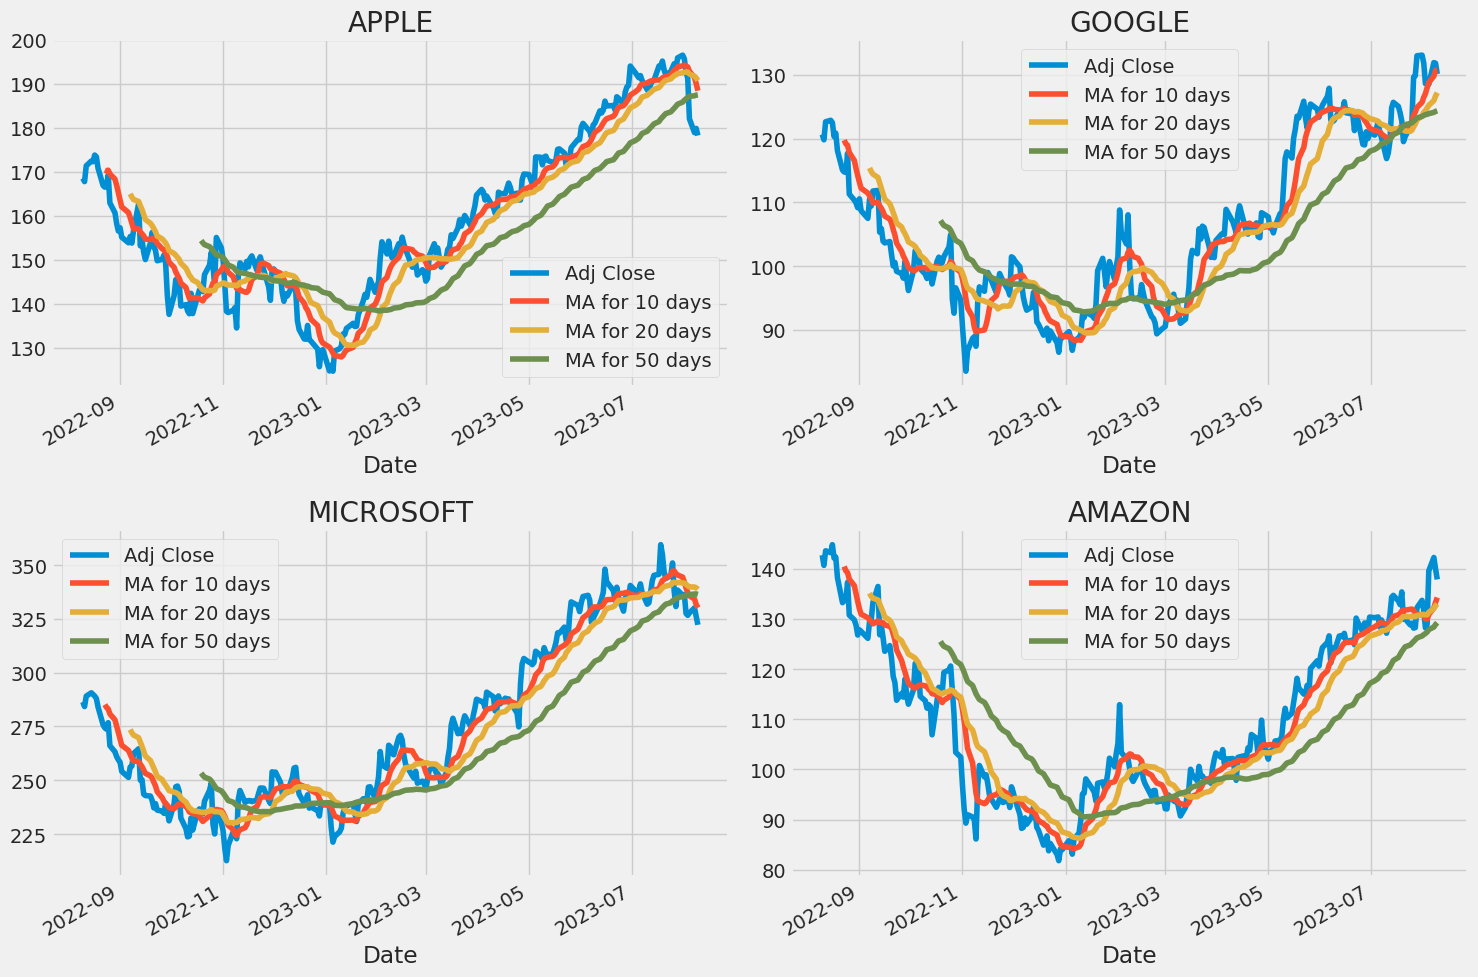

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in cmpy_lst:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

**Percentage Change and Plotting the Daily Return Percentage of Tech Stocks**

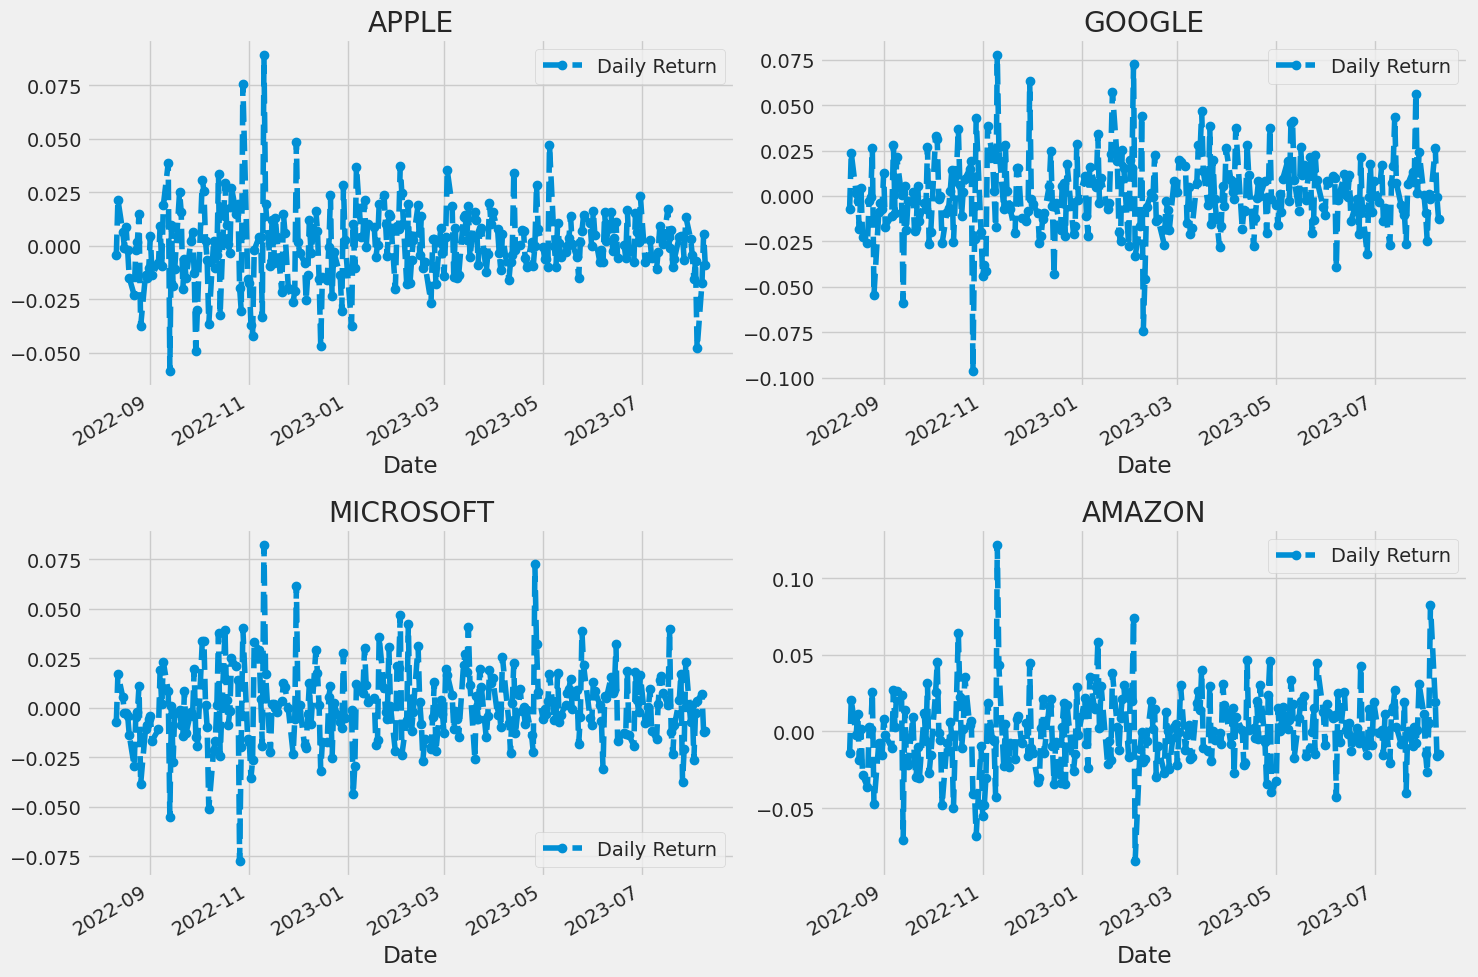

In [15]:
# pct_change to find the percent change for each day
for company in cmpy_lst:
    company['Daily Return'] = company['Adj Close'].pct_change()

# plotting the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

**Sub Plots Determining the Daily returns and Count of Tech Stocks**

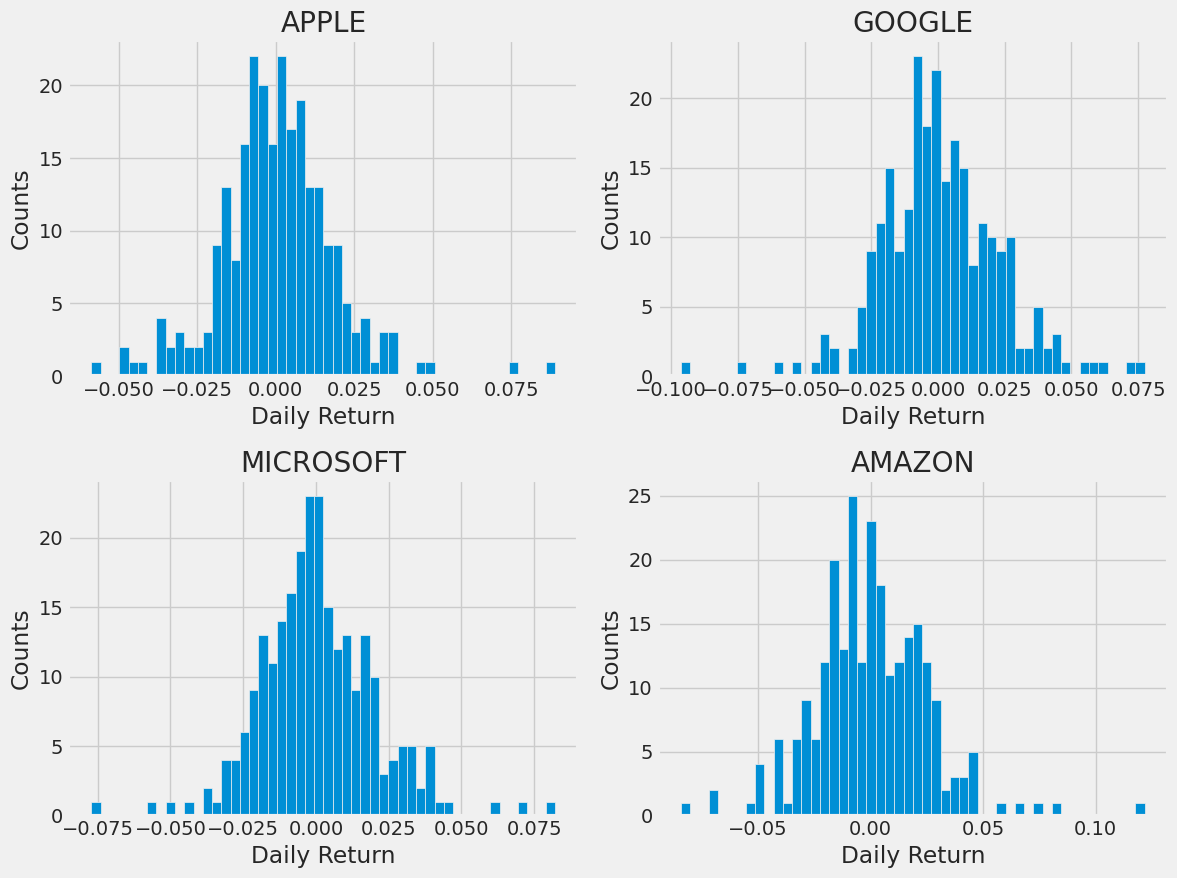

In [17]:
# Plotting the subplots for Daily returns and count of Tech Stocks
plt.figure(figsize=(12, 9))

for i, company in enumerate(cmpy_lst, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [19]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_lst, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-10,NaN,NaN,NaN,NaN
2022-08-11,-0.004432,-0.014367,-0.006879,-0.007401
2022-08-12,0.021426,0.020691,0.023619,0.017037
2022-08-15,0.006334,-0.002578,0.001875,0.005344
2022-08-16,-0.000924,0.011175,-0.003011,-0.002590


**Linear Relationship in Google Stock itself**

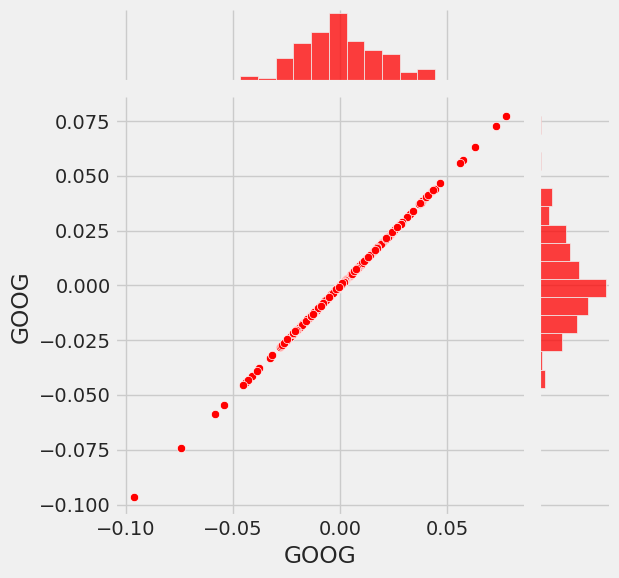

In [20]:
# Comparing Google to itself to show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='red')

**Comaprision of Daily results of Google and Microsoft**

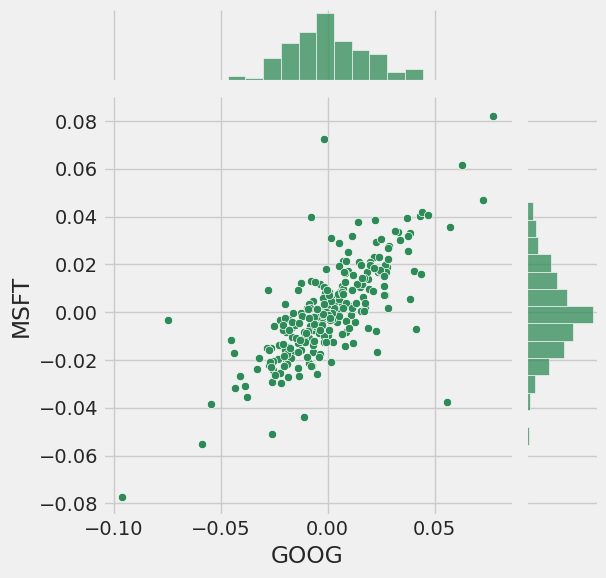

In [22]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter',color='seagreen')

**Pairplot for AVA(Automatic Visual Analysis)**

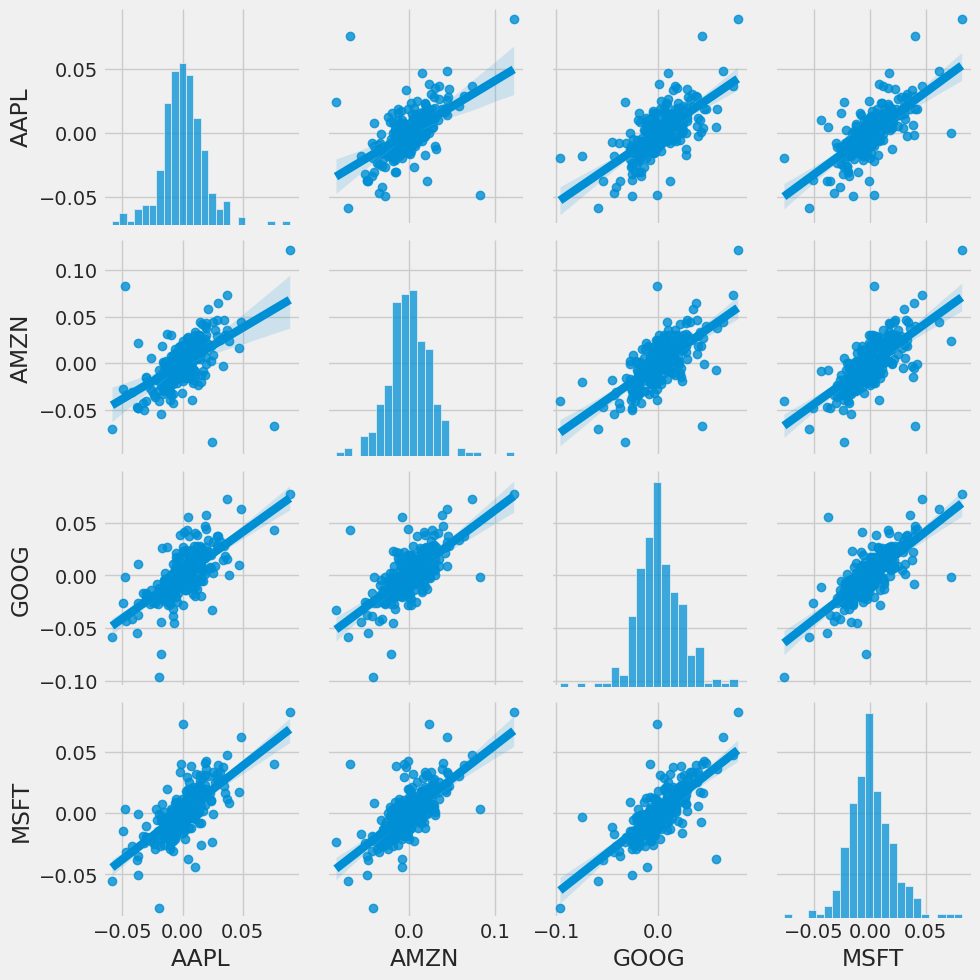

In [25]:
# pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_rets, kind='reg')

**Relationships on daily returns between stocks**

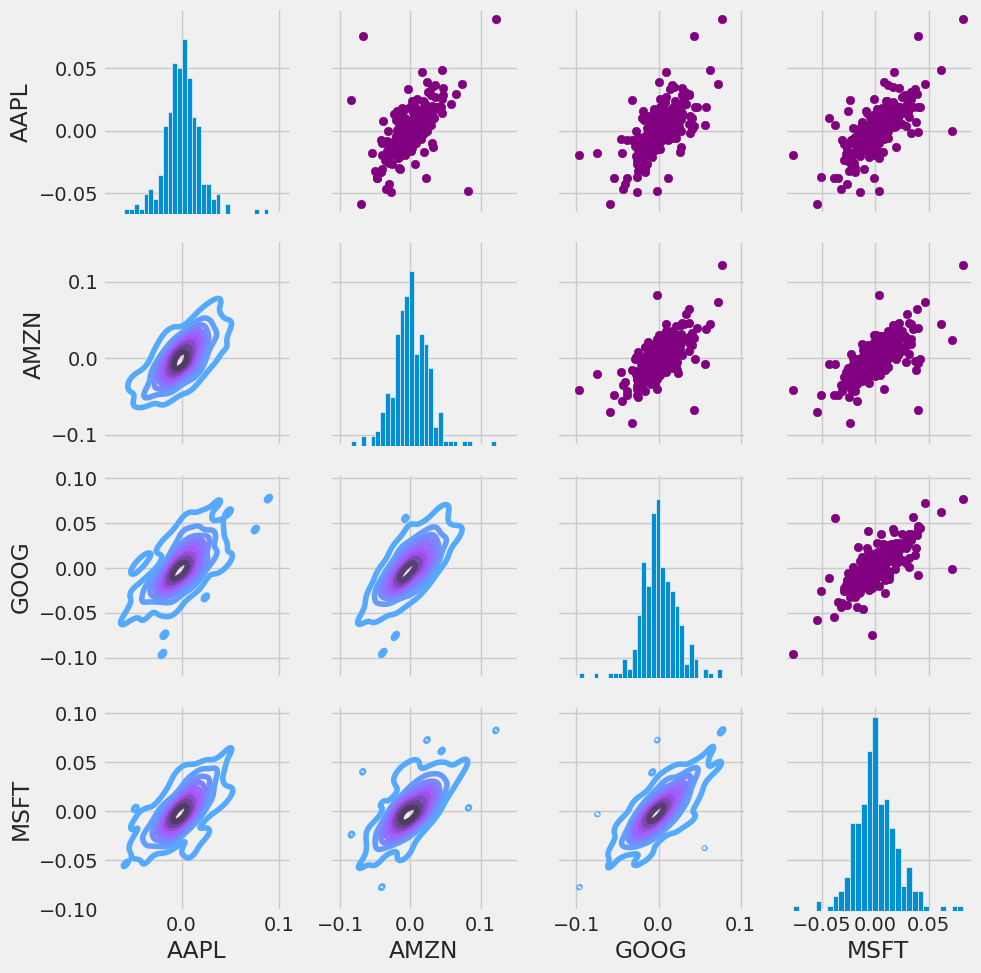

In [26]:
# Set up our figure by naming it rtn_fig, call PairPLot on the DataFrame
rtn_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
rtn_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
rtn_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
rtn_fig.map_diag(plt.hist, bins=30)

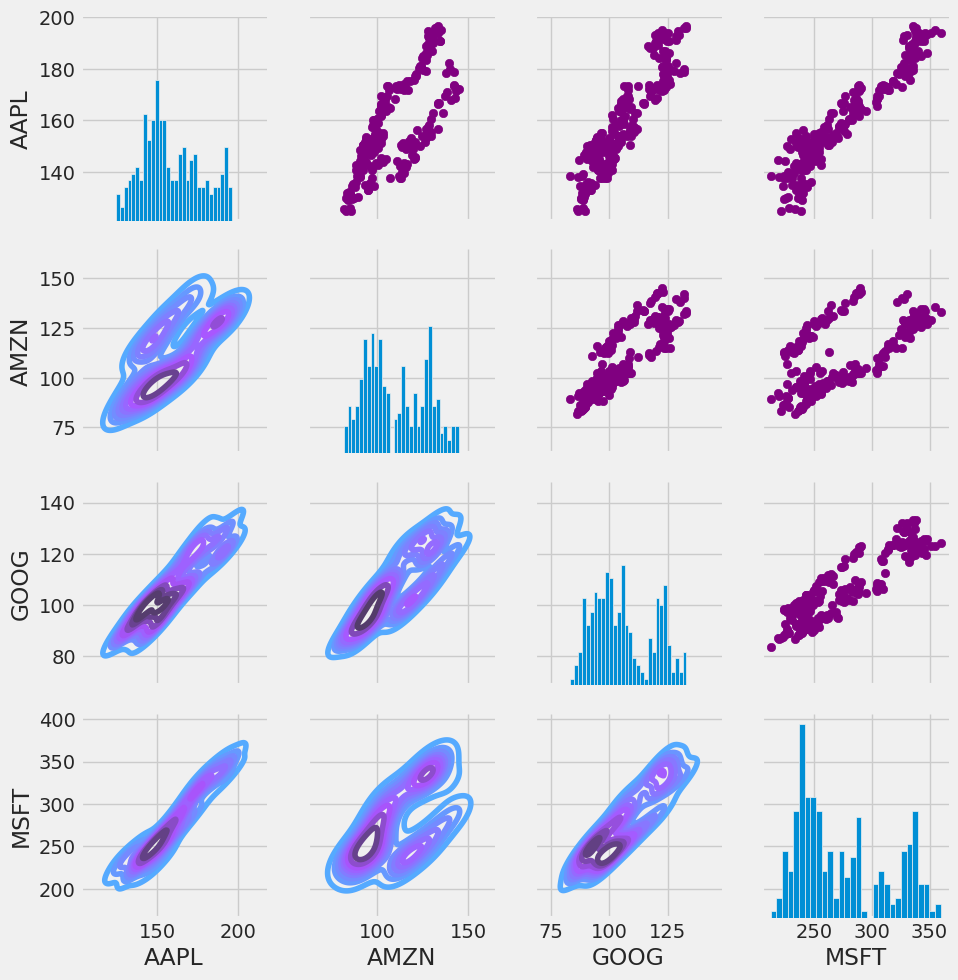

In [27]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

**Heat Map for Tech Stocks**

Text(0.5, 1.0, 'Correlation of stock closing price')

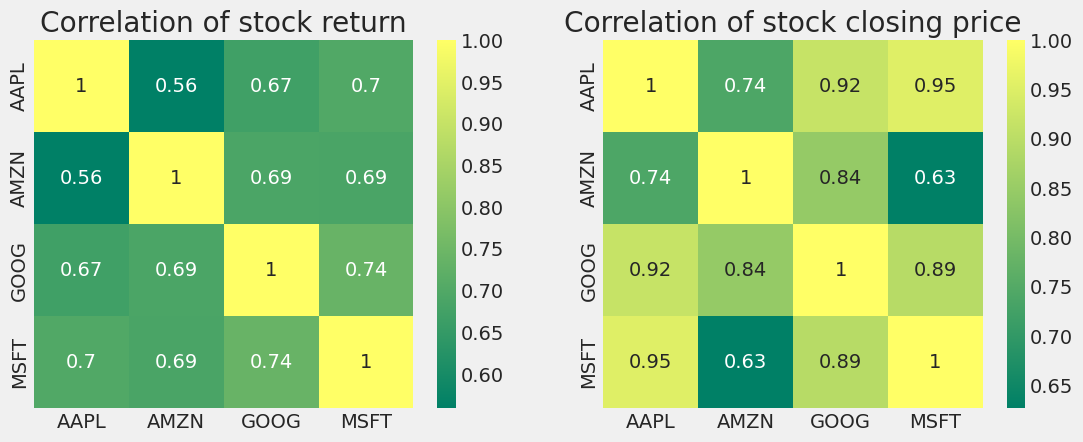

In [28]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

**Plot of Expected Return Vs Risk**

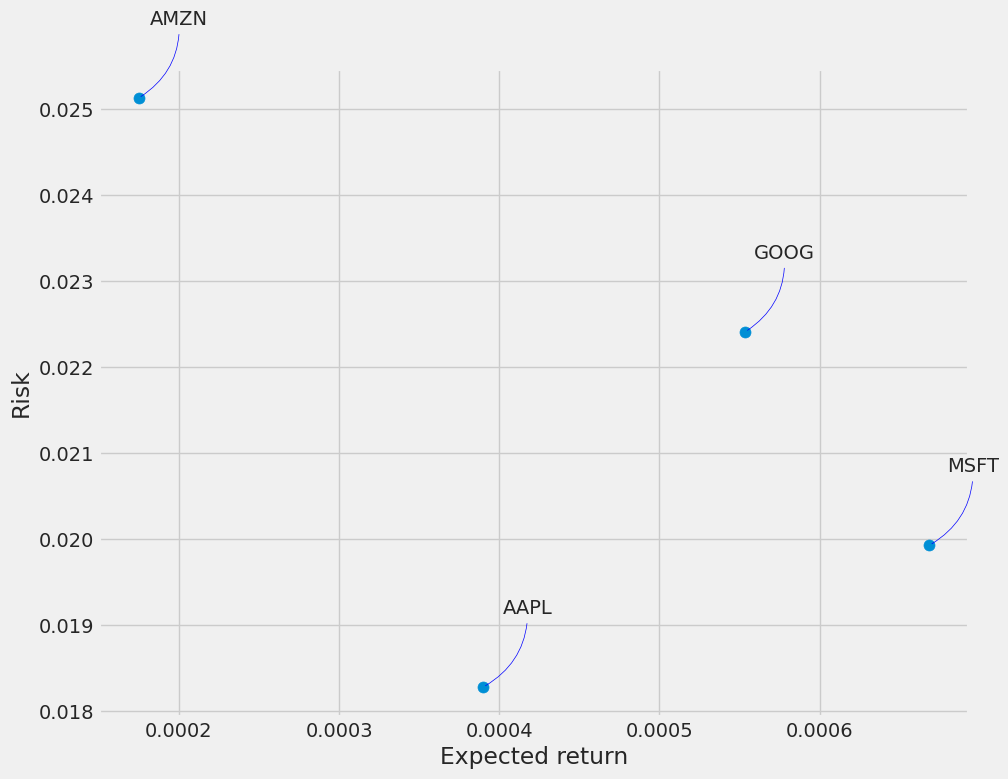

In [29]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

**Stock Quote Values**

In [30]:
# stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482927,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550012,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689341,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821993,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801654,394024400
...,...,...,...,...,...,...
2023-08-03,191.570007,192.369995,190.690002,191.169998,191.169998,61235200
2023-08-04,185.520004,187.380005,181.919998,181.990005,181.990005,115799700
2023-08-07,182.130005,183.130005,177.350006,178.850006,178.850006,97576100


**Close Price History**

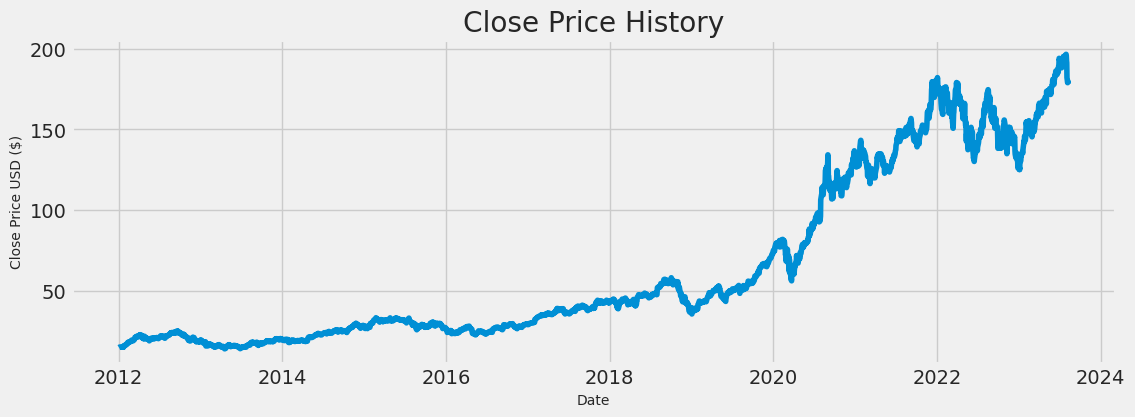

In [32]:
plt.figure(figsize=(12,4))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Price USD ($)', fontsize=10)
plt.show()

**Trainig the Data**

In [33]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2774

**Scaling the Data**

In [34]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.90356301],
       [0.9087684 ],
       [0.8999466 ]])

**Creation of Training and Scaled Training data set**

In [35]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

**Building the Model**

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2714/2714 [==============================] - 121s 43ms/step - loss: 0.0012


**Testing Data Set**

In [37]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 2s 40ms/step


3.6039905945133595

**Prediction Plot**

<ipython-input-38-cde963b77f8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


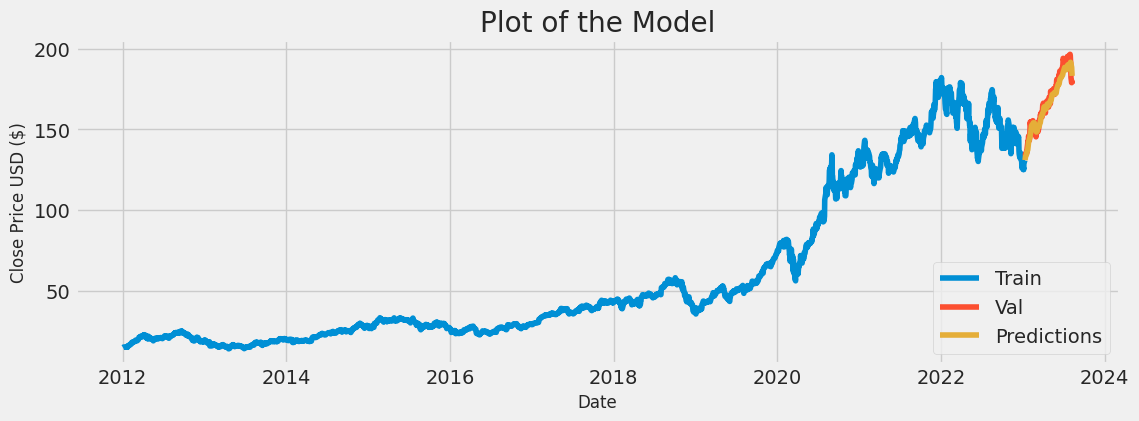

In [38]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12,4))
plt.title('Plot of the Model')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

**Valid and Predicted Prices**

In [39]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-01-11,133.490005,130.874649
2023-01-12,133.410004,131.991211
2023-01-13,134.759995,133.053482
2023-01-17,135.940002,134.120926
2023-01-18,135.210007,135.185211
...,...,...
2023-08-03,191.169998,191.289169
2023-08-04,181.990005,190.617065
2023-08-07,178.850006,188.409775


**Conclusion**

1. Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data.
2. Notice also that weekends are missing from the records.
3. From the data set we can conclude that there will be a slight decrease in the predicted stock price in the January month and gets increased during the August Month